## Streaming

<p1>Methods: .stream() and astream()</p1>
- These methods are sync and async methods for streaming back results
<br>

<p1>Additional parameters in Streaming modes for graph state</p1>

- Values: This streams the full state of the graph after each node is called
- updates: This streams updates to the state of the graph after each node is called

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

from dotenv import load_dotenv
load_dotenv()

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model='gpt-4.1-nano')
llm.invoke("Hello").content

'Hello! How can I assist you today?'

### We Will Start With Creating Nodes



In [3]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

def superbot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}

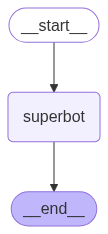

In [4]:
graph = StateGraph(state_schema=State)

## node
graph.add_node('superbot', superbot)

## edges
graph.add_edge(START,'superbot')
graph.add_edge('superbot',END)


from IPython.display import Image, display
graph = graph.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
## Invocation
config = {'configurable': {'thread_id':'1'}}

graph.invoke(
    {
        'messages':'hi, my name is Rahul and I like OnePiece'
    },
    config=config
)

{'messages': [HumanMessage(content='hi, my name is Rahul and I like OnePiece', additional_kwargs={}, response_metadata={}, id='d19d847a-1166-4280-9985-d77922252664'),
  AIMessage(content="Hi Rahul! It's great to meet a One Piece fan. Who's your favorite character in the series?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 18, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BrSIOVmd1j3LS5HJQ5Sj23ZTLn5aV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--841c0b95-ec68-4cee-ab69-eca9aff6f3fe-0', usage_metadata={'input_tokens': 18, 'output_tokens': 21, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read':

## Streaming the Response with stream methods

In [6]:
# Create a thread
config = {'configurable':{'thread_id':'2'}}

In [7]:
for chunk in graph.stream({
        'messages':'hi, my name is Rahul and I like OnePiece'
    },
    config=config,
    stream_mode='updates'):
    print(chunk)


{'superbot': {'messages': [AIMessage(content="Hi Rahul! That's great to hear—you’re a fan of One Piece too? It's such an amazing series with incredible characters and adventures. Do you have a favorite character or arc?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 18, 'total_tokens': 54, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BrSLwJ2sdfpaZgPebGEh0xklxQckE', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d7150ad8-e18b-4326-a12c-8045b3da6381-0', usage_metadata={'input_tokens': 18, 'output_tokens': 36, 'total_tokens': 54, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
for chunk in graph.stream({
        'messages':'hi, my name is Rahul and I like OnePiece'
    },
    config=config,
    stream_mode='values'):
    print(chunk)

{'messages': [HumanMessage(content='hi, my name is Rahul and I like OnePiece', additional_kwargs={}, response_metadata={}, id='4e81aa5c-f4e3-4118-a25a-b124a2f30b01'), AIMessage(content="Hi Rahul! That's great to hear—you’re a fan of One Piece too? It's such an amazing series with incredible characters and adventures. Do you have a favorite character or arc?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 18, 'total_tokens': 54, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BrSLwJ2sdfpaZgPebGEh0xklxQckE', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d7150ad8-e18b-4326-a12c-8045b3da6381-0', usage_metadata={'input_tokens': 18, 'output_t

In [9]:
for chunk in graph.stream({
        'messages':'i like zoro'
    },
    config=config,
    stream_mode='updates'):
    print(chunk)

{'superbot': {'messages': [AIMessage(content="That's awesome, Rahul! Roronoa Zoro is a fantastic character—strong, loyal, and skilled with his swords. He's definitely a fan favorite for many. Do you like his swordsmanship style or his personality the most?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 123, 'total_tokens': 170, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BrSNX28zBVluLbQTGWFeVMHCTIHZB', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--db2c0f64-dc96-4e4b-ba50-9bf8b3ad2b58-0', usage_metadata={'input_tokens': 123, 'output_tokens': 47, 'total_tokens': 170, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token

In [10]:
for chunk in graph.stream({
        'messages':'i also like Bon Chan'
    },
    config=config,
    stream_mode='values'):
    print(chunk)

{'messages': [HumanMessage(content='hi, my name is Rahul and I like OnePiece', additional_kwargs={}, response_metadata={}, id='4e81aa5c-f4e3-4118-a25a-b124a2f30b01'), AIMessage(content="Hi Rahul! That's great to hear—you’re a fan of One Piece too? It's such an amazing series with incredible characters and adventures. Do you have a favorite character or arc?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 18, 'total_tokens': 54, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BrSLwJ2sdfpaZgPebGEh0xklxQckE', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d7150ad8-e18b-4326-a12c-8045b3da6381-0', usage_metadata={'input_tokens': 18, 'output_t

In [23]:
config = {'configurable':{'thread_id':'123'}}
for chunk in graph.stream({
        'messages':'i am rahul i like one piece'
    },
    config=config,
    stream_mode='values'):
    print(chunk)
    

{'messages': [HumanMessage(content='i am rahul i like one piece', additional_kwargs={}, response_metadata={}, id='09af1625-071f-4d53-ad5f-c78f66737e66')]}
{'messages': [HumanMessage(content='i am rahul i like one piece', additional_kwargs={}, response_metadata={}, id='09af1625-071f-4d53-ad5f-c78f66737e66'), AIMessage(content="Hi Rahul! That's great to hear you like One Piece. It's such an amazing anime and manga series with an exciting adventure and memorable characters. Do you have a favorite character or arc?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 15, 'total_tokens': 52, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BrSU2fLMzSjmvRzaQf2Q5RV3XfrnC', 'service_

In [24]:
for chunk in graph.stream({
        'messages':'i like that gay guy Bon Chan who saved luffy'
    },
    config=config,
    stream_mode='values'):
    print(chunk)

{'messages': [HumanMessage(content='i am rahul i like one piece', additional_kwargs={}, response_metadata={}, id='09af1625-071f-4d53-ad5f-c78f66737e66'), AIMessage(content="Hi Rahul! That's great to hear you like One Piece. It's such an amazing anime and manga series with an exciting adventure and memorable characters. Do you have a favorite character or arc?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 15, 'total_tokens': 52, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BrSU2fLMzSjmvRzaQf2Q5RV3XfrnC', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b5858e22-9ecd-4968-9c00-74d88e664bf8-0', usage_metadata={'input_tokens': 15, 'output